In [1]:
import random
import numpy as np
import pandas as pd
from collections import Counter

In [3]:
df = pd.read_csv('2010-20.csv')

In [4]:
df.columns

Index(['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6',
       'Column 7', 'Column 8', 'Column 9', 'Column 10', 'Column 11',
       'Column 12', 'Column 13', 'Column 14', 'Column 15', 'Column 16',
       'Column 17', 'Column 18', 'Column 19', 'Column 20'],
      dtype='object')

In [5]:
df = df.rename(columns={'Column 1': 'Ticket #', 'Column 2': 'Winning #'})
df.head()

,Ticket #,Winning #,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-May-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2965,5|9|18|19|20,No Data,"$180,050.24",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03-May-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2966,2|3|9|15|19,No Data,"$150,373.93",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df[['Ticket #', 'Winning #']]

In [7]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
df1.head()

,Ticket #,Winning #
0,2965,5|9|18|19|20
1,2966,2|3|9|15|19
2,2967,4|5|9|12|13
3,2968,2|7|10|16|18
4,2969,2|7|10|13|17


In [8]:
win = df1['Winning #']
win = win.str.replace('|', " ")

In [9]:
# Create an empty list 
Row_list =[] 
  
# Iterate over each row 
for rows in win: 
    # Create list for the current row 
    my_list = rows
    l = [int(s) for s in my_list.split() if s.isdigit()]
      
    # append the list to the final list 
    Row_list.append(l) 
  
# Print the list 
len(Row_list) 

3070

In [18]:
df1 = df1.drop(columns = ['Winning #'])
df1["Winning #"] = Row_list

In [19]:
df1.head()

,Ticket #,Winning #
0,2965,"[5, 9, 18, 19, 20]"
1,2966,"[2, 3, 9, 15, 19]"
2,2967,"[4, 5, 9, 12, 13]"
3,2968,"[2, 7, 10, 16, 18]"
4,2969,"[2, 7, 10, 13, 17]"


In [21]:
all_ = df1["Winning #"]
all_.value_counts()

[1, 2, 10, 13, 20]     3
[5, 6, 11, 18, 19]     3
[5, 8, 9, 13, 16]      3
[3, 9, 15, 16, 19]     3
[3, 4, 5, 7, 19]       3
[3, 8, 12, 13, 17]     3
[2, 3, 7, 8, 9]        3
[3, 4, 6, 11, 16]      3
[1, 6, 8, 15, 20]      3
[1, 11, 13, 16, 19]    3
[1, 10, 14, 16, 19]    3
[1, 4, 7, 16, 19]      3
[3, 8, 15, 17, 19]     3
[4, 8, 12, 16, 19]     3
[1, 5, 10, 13, 15]     3
[1, 5, 7, 14, 16]      3
[5, 7, 11, 17, 20]     3
[1, 15, 16, 18, 19]    2
[3, 12, 15, 16, 20]    2
[7, 8, 10, 17, 18]     2
[2, 5, 7, 10, 20]      2
[4, 5, 11, 18, 19]     2
[7, 9, 12, 14, 17]     2
[7, 9, 12, 14, 19]     2
[1, 3, 5, 12, 13]      2
[5, 8, 13, 14, 19]     2
[3, 6, 8, 10, 12]      2
[2, 9, 14, 15, 18]     2
[0, 0, 0, 0, 0]        2
[1, 3, 9, 13, 19]      2
                      ..
[7, 8, 14, 18, 19]     1
[1, 5, 9, 10, 13]      1
[4, 5, 6, 13, 18]      1
[1, 6, 7, 10, 11]      1
[1, 4, 5, 11, 12]      1
[3, 4, 7, 11, 12]      1
[1, 5, 6, 16, 17]      1
[6, 7, 8, 9, 17]       1
[1, 3, 4, 12, 14]      1


In [10]:
def flatten(seq, container=None):
    if container is None:
        container = []

    for s in seq:
        try:
            iter(s)  # check if it's iterable
        except TypeError:
            container.append(s)
        else:
            flatten(s, container)

    return container

In [11]:
a = flatten(Row_list)
new = []

for i in range(1,21):
    new.append(a.count(i))
    
num = []

for i in range(1,21):
    num.append(i)

In [12]:
data = {'Number':  num, 'Occurrence': new}
df2 = pd.DataFrame(data, columns = ['Number', 'Occurrence'])

df2

,Number,Occurrence
0,1,745
1,2,766
2,3,755
3,4,773
4,5,788
5,6,748
6,7,794
7,8,746
8,9,823
9,10,765


In [13]:
df2.sort_values(by=['Occurrence'], ascending = False)

,Number,Occurrence
8,9,823
6,7,794
15,16,791
4,5,788
11,12,784
12,13,782
14,15,782
17,18,773
3,4,773
13,14,769


In [14]:
tot = np.sum(df2["Occurrence"])

occ = df2["Occurrence"]
prob = []

for i in occ:
    temp = round(i/tot , 3)
    prob.append(temp)

In [15]:
df2['Probability'] = prob
df2.sort_values(by=['Occurrence'], ascending = False)

,Number,Occurrence,Probability
8,9,823,0.054
6,7,794,0.052
15,16,791,0.052
4,5,788,0.051
11,12,784,0.051
12,13,782,0.051
14,15,782,0.051
17,18,773,0.050
3,4,773,0.050
13,14,769,0.050


In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

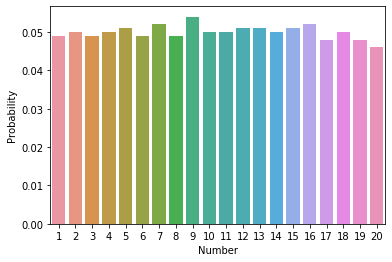

In [34]:
sns.barplot(df2["Number"],df2["Probability"])

In [35]:
import itertools

In [42]:
def combinations(array, tuple_length, prev_array=[]):
    if len(prev_array) == tuple_length:
        return [prev_array]
    combs = []
    for i, val in enumerate(array):
        prev_array_extended = prev_array.copy()
        prev_array_extended.append(val)
        combs += combinations(array[i+1:], tuple_length, prev_array_extended)
    return combs

In [53]:
pred = combinations([2,3,4,7,9,12,13,15,16,18], 5)

In [54]:
bools = []
for i in pred:
    bools.append(i in Row_list)
    
    
bools.count(True)
    

49

In [48]:
len(Row_list)

3070

In [57]:
len(pred)

252